# Model Selection

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

### Import the dataset

In [2]:
dataset = pd.read_csv('C:\\Users\\SHADOW\\Technical Seminar\\IPL\\DATASETS\\encoded.csv')
dataset

,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Buffalo Park,venue_De Beers Diamond Oval,venue_Dr DY Patil Sports Academy,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Dubai International Cricket Stadium,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_Himachal Pradesh Cricket Association Stadium,...,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,inning,season,overs,runs_last5,wickets_last5,cum_runs,cum_wickets,total_runs
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,0.1,1,0,1,0,222
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,0.2,1,0,1,0,222
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,0.3,2,0,2,0,222
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,0.4,2,0,2,0,222
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,0.5,2,0,2,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166148,0,0,0,0,0,0,1,0,0,0,...,0,0,2,2020,17.6,42,2,154,4,157
166149,0,0,0,0,0,0,1,0,0,0,...,0,0,2,2020,18.1,42,2,155,4,157
166150,0,0,0,0,0,0,1,0,0,0,...,0,0,2,2020,18.2,42,2,156,4,157
166151,0,0,0,0,0,0,1,0,0,0,...,0,0,2,2020,18.3,41,3,156,5,157


_Consider overs data from 5 onwards for better prediction_

In [3]:
dataset = dataset[dataset['overs'] >= 5]

In [4]:
dataset

,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Buffalo Park,venue_De Beers Diamond Oval,venue_Dr DY Patil Sports Academy,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Dubai International Cricket Stadium,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_Himachal Pradesh Cricket Association Stadium,...,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,inning,season,overs,runs_last5,wickets_last5,cum_runs,cum_wickets,total_runs
32,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,5.1,59,0,61,0,222
33,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,5.2,59,1,61,1,222
34,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,5.3,59,1,61,1,222
35,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,5.4,59,1,61,1,222
36,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,5.5,58,1,61,1,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166148,0,0,0,0,0,0,1,0,0,0,...,0,0,2,2020,17.6,42,2,154,4,157
166149,0,0,0,0,0,0,1,0,0,0,...,0,0,2,2020,18.1,42,2,155,4,157
166150,0,0,0,0,0,0,1,0,0,0,...,0,0,2,2020,18.2,42,2,156,4,157
166151,0,0,0,0,0,0,1,0,0,0,...,0,0,2,2020,18.3,41,3,156,5,157


### Data Split

Split the data into training and testing sets.
_Since, this is a time series data we cant't use train_test_split()._

Features-

In [5]:
X_train = dataset.drop(labels = 'total_runs', axis=1)[dataset['season'] <= 2017]
X_test = dataset.drop(labels = 'total_runs', axis=1)[dataset['season'] >= 2018]

Predictions-

In [6]:
y_train = dataset[dataset['season'] <= 2017]['total_runs'].values
y_test = dataset[dataset['season'] >= 2018]['total_runs'].values

Drop season column which is not useful for prediction

In [7]:
X_train.drop(columns = 'season', inplace=True)
X_test.drop(columns = 'season', inplace=True)

## Functions:

In [8]:
def train_predict_values(object):
    y_pred = object.predict(X_train)
    np.set_printoptions(precision=0)
    print(np.concatenate((y_pred.reshape(len(y_pred),1), y_train.reshape(len(y_train),1)),1))
    print(' ')
    # print('CV: ', cross_val_score(estimator = object, X=X_train, y=y_train, scoring = 'neg_mean_squared_error', cv=5).mean())
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_pred,y_train)))
    print('R2 Score: ', object.score(X_train,y_train))
    sns.distplot(y_pred.reshape(len(y_pred),1)), y_train.reshape(len(y_train),1)

In [9]:
def test_predict_values(object):
    y_pred = object.predict(X_test)
    np.set_printoptions(precision=0)
    print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
    RMSE = np.sqrt(metrics.mean_squared_error(y_pred,y_test))
    R2_score = object.score(X_test,y_test)
    print(' ')
    print('RMSE: ', RMSE)
    print('R2_score: ', R2_score)
    sns.distplot(y_pred.reshape(len(y_pred),1)), y_test.reshape(len(y_test),1)

In [10]:
def example(object):
    temp_array = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 10.5, 40, 1, 60, 3]
    data = np.array([temp_array])
    my_prediction = int(object.predict(data)[0])
    print('Score: ', my_prediction)

# ML Models

### 1. Multiple Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

[[185. 222.]
 [181. 222.]
 [180. 222.]
 ...
 [149. 111.]
 [148. 111.]
 [152. 111.]]
 
RMSE:  18.929716824055966
R2 Score:  0.5683495782910575


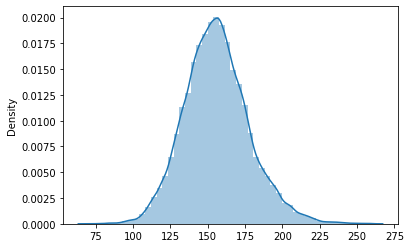

In [12]:
train_predict_values(linear_regressor)

[[151. 165.]
 [151. 165.]
 [154. 165.]
 ...
 [166. 157.]
 [162. 157.]
 [162. 157.]]
 
RMSE:  20.48709386755554
R2_score:  0.4734224189671806


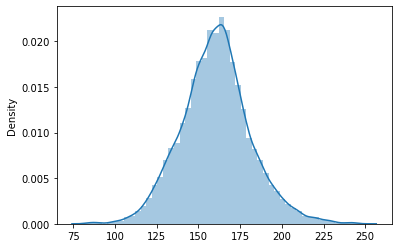

In [13]:
test_predict_values(linear_regressor)

In [14]:
example(linear_regressor)

Score:  144


### 2. Decision Tree Regression

In [15]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

[[222. 222.]
 [222. 222.]
 [222. 222.]
 ...
 [111. 111.]
 [111. 111.]
 [111. 111.]]
 
RMSE:  0.12542222287349417
R2 Score:  0.9999810507108783


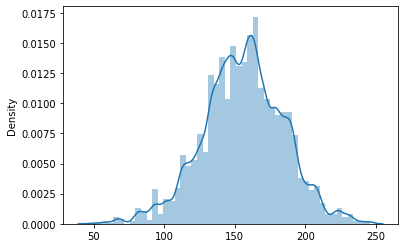

In [16]:
train_predict_values(dt_regressor)

[[164. 165.]
 [164. 165.]
 [140. 165.]
 ...
 [161. 157.]
 [161. 157.]
 [174. 157.]]
 
RMSE:  27.61071934731001
R2_score:  0.043561403152656


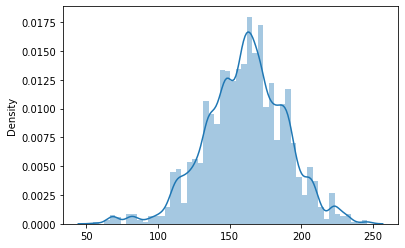

In [17]:
test_predict_values(dt_regressor)

In [18]:
example(dt_regressor)

Score:  187


### 3. Random Forest Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

[[223. 222.]
 [222. 222.]
 [222. 222.]
 ...
 [116. 111.]
 [111. 111.]
 [137. 111.]]
 
RMSE:  2.970119935863313
R2 Score:  0.9893734593299246


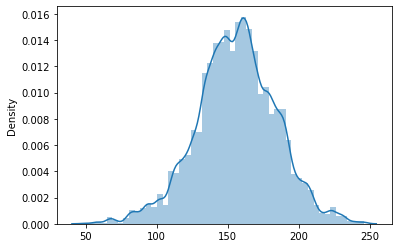

In [20]:
train_predict_values(rf_regressor)

[[156. 165.]
 [156. 165.]
 [148. 165.]
 ...
 [170. 157.]
 [169. 157.]
 [167. 157.]]
 
RMSE:  21.920538202426947
R2_score:  0.39715720264746723


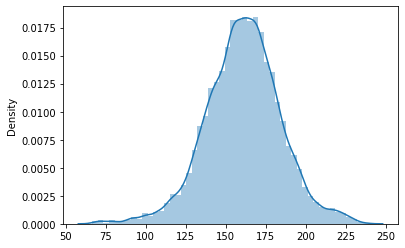

In [21]:
test_predict_values(rf_regressor)

In [22]:
example(rf_regressor)

Score:  163


### 4. Ridge Regression

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

In [24]:
ridge = Ridge()
parameters = {'alpha' :[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 10, 20, 30, 30, 50]}
ridge_regressor = RandomizedSearchCV(ridge, parameters)
ridge_regressor.fit(X_train, y_train)

RandomizedSearchCV(estimator=Ridge(),
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 10, 20, 30, 30,
                                                  50]})

In [25]:
print(ridge_regressor.best_params_)

{'alpha': 50}


[[185. 222.]
 [181. 222.]
 [180. 222.]
 ...
 [149. 111.]
 [149. 111.]
 [152. 111.]]
 
RMSE:  18.92963181022956
R2 Score:  0.5683534553877894


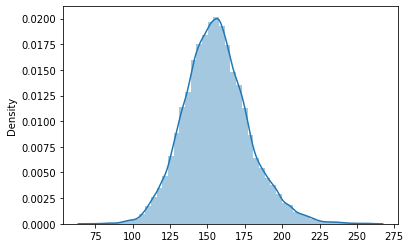

In [26]:
train_predict_values(ridge_regressor)

[[151. 165.]
 [151. 165.]
 [154. 165.]
 ...
 [166. 157.]
 [162. 157.]
 [162. 157.]]
 
RMSE:  20.489327687816708
R2_score:  0.47330758142064466


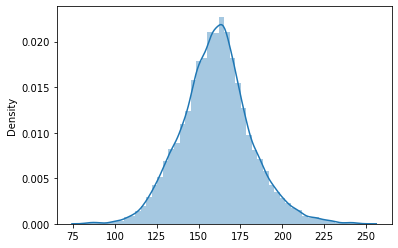

In [27]:
test_predict_values(ridge_regressor)

In [28]:
example(ridge_regressor)

Score:  144


### 5. Lasso Regression

In [29]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

In [30]:
lasso = Lasso()
parameters = {'alpha' :[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 10, 20, 30, 30, 50]}
lasso_regressor = RandomizedSearchCV(lasso, parameters)
lasso_regressor.fit(X_train, y_train)

RandomizedSearchCV(estimator=Lasso(),
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 10, 20, 30, 30,
                                                  50]})

In [31]:
print(lasso_regressor.best_params_)

{'alpha': 1}


[[184. 222.]
 [181. 222.]
 [180. 222.]
 ...
 [151. 111.]
 [150. 111.]
 [153. 111.]]
 
RMSE:  19.50720490533321
R2 Score:  0.5416111694418532


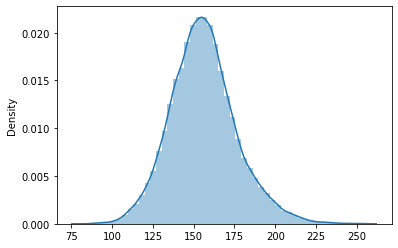

In [32]:
train_predict_values(lasso_regressor)

[[144. 165.]
 [143. 165.]
 [146. 165.]
 ...
 [170. 157.]
 [167. 157.]
 [167. 157.]]
 
RMSE:  20.223627925542704
R2_score:  0.4868790063314461


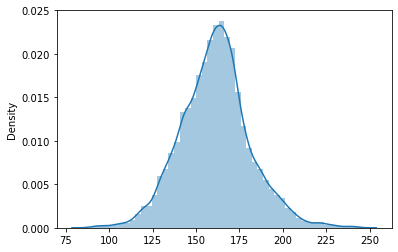

In [33]:
test_predict_values(lasso_regressor)

In [34]:
example(lasso_regressor)

Score:  139


### 5. Support Vector Regression

In [35]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(X_train, y_train)

SVR()

[[184. 222.]
 [181. 222.]
 [181. 222.]
 ...
 [156. 111.]
 [155. 111.]
 [159. 111.]]
 
RMSE:  20.242155098844826
R2 Score:  0.506420138966111


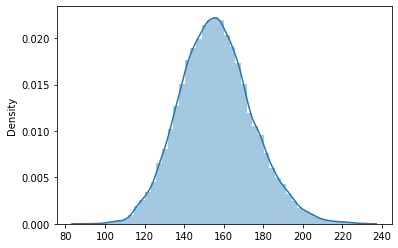

In [36]:
train_predict_values(svr_regressor)

[[140. 165.]
 [139. 165.]
 [141. 165.]
 ...
 [172. 157.]
 [169. 157.]
 [170. 157.]]
 
RMSE:  20.930104867177203
R2_score:  0.45040286618480785


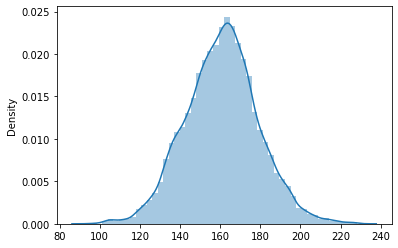

In [37]:
test_predict_values(svr_regressor)

In [38]:
example(svr_regressor)

Score:  145


### 6. KNN Regressor

In [109]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

In [110]:
knn = KNeighborsRegressor()
parameters = {'n_neighbors' :[1,2,3,4,5]}
knn_regressor = RandomizedSearchCV(knn, parameters)
knn_regressor.fit(X_train, y_train)

RandomizedSearchCV(estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5]})

In [111]:
print(knn_regressor.best_params_)

{'n_neighbors': 5}


[[222. 222.]
 [222. 222.]
 [222. 222.]
 ...
 [123. 111.]
 [113. 111.]
 [154. 111.]]
 
RMSE:  10.524107256258679
R2 Score:  0.8665819877036468


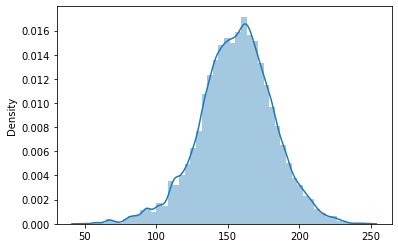

In [112]:
train_predict_values(knn_regressor)

[[166. 165.]
 [166. 165.]
 [156. 165.]
 ...
 [172. 157.]
 [165. 157.]
 [165. 157.]]
 
RMSE:  22.727402559478946
R2_score:  0.3519608264446923


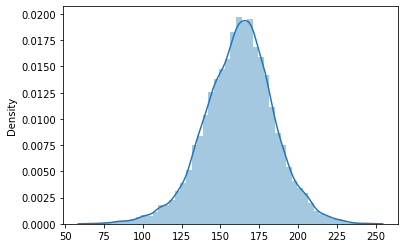

In [113]:
test_predict_values(knn_regressor)

In [114]:
example(knn_regressor)

Score:  159


## Pickle files

In [39]:
filename = 'ridge_regression_predict.pkl'
pickle.dump(ridge_regressor, open(filename, 'wb'))

In [40]:
filename = 'lasso_regression_predict.pkl'
pickle.dump(lasso_regressor, open(filename, 'wb'))

In [41]:
filename = 'svr_regression_predict.pkl'
pickle.dump(svr_regressor, open(filename, 'wb'))